**Cats vs Dogs Classification**

**Note:**
 1. You have to submit your kaggle API token in '/contents/' for running this code as one should not share there own token to others. **(Security Risks)**
 2. This program must not be run on personal computers because it may take very long to complete the training of the model. Instead use **T4 GPU**.

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 43.8MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.5MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#loading local weight file
#local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
local_weights_file = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [ ]:
#Setting old model
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape = (150, 150, 3),
    include_top = False,
    weights = None)

In [ ]:
pre_trained_model.load_weights(local_weights_file)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable=False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_470 (Conv2D)       │ (None, 74, 74, 32)     │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_470   │ (None, 74, 74, 32)     │             96 │ conv2d_470[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_470            │ (None, 74, 74, 32)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_471 (Conv2D)       │ (None, 72, 72, 32)     │          9,216 │ activation_470[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_471   │ (None, 72, 72, 32)     │             96 │ conv2d_471[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_471            │ (None, 72, 72, 32)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_472 (Conv2D)       │ (None, 72, 72, 64)     │         18,432 │ activation_471[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_472   │ (None, 72, 72, 64)     │            192 │ conv2d_472[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_472            │ (None, 72, 72, 64)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 35, 35, 64)     │              0 │ activation_472[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_473 (Conv2D)       │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_20[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_473   │ (None, 35, 35, 80)     │            240 │ conv2d_473[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_473            │ (None, 35, 35, 80)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_474 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
last_layer=pre_trained_model.get_layer('mixed7')
print('Last layer output shape: ', last_layer.output.shape)
last_output=last_layer.output
print(last_output)

Last layer output shape:  (None, 7, 7, 768)
<KerasTensor shape=(None, 7, 7, 768), dtype=float32, sparse=False, name=keras_tensor_1783>


In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense  (1, activation='sigmoid')(x)

# Append the dense network to the base model
model = tf.keras.Model(pre_trained_model.input, x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_470 (Conv2D)       │ (None, 74, 74, 32)     │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_470   │ (None, 74, 74, 32)     │             96 │ conv2d_470[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_470            │ (None, 74, 74, 32)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_471 (Conv2D)       │ (None, 72, 72, 32)     │          9,216 │ activation_470[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_471   │ (None, 72, 72, 32)     │             96 │ conv2d_471[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_471            │ (None, 72, 72, 32)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_472 (Conv2D)       │ (None, 72, 72, 64)     │         18,432 │ activation_471[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_472   │ (None, 72, 72, 64)     │            192 │ conv2d_472[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_472            │ (None, 72, 72, 64)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 35, 35, 64)     │              0 │ activation_472[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_473 (Conv2D)       │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_20[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_473   │ (None, 35, 35, 80)     │            240 │ conv2d_473[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_473            │ (None, 35, 35, 80)     │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_474 (Conv2D)  

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 38,537,217 (147.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2),
    ])

In [ ]:
# Attaching data augmentation model to the base model
inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = model(x)

model_with_aug = tf.keras.Model(inputs, x)

In [ ]:
model_with_aug.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [ ]:
BASE_DIR = '/content/dogs_vs_cats'

train_dir = os.path.join(BASE_DIR, 'train')
test_dir = os.path.join(BASE_DIR, 'test')

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    )


test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Define the preprocess function
def preprocess(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

# Apply the preprocessing to the datasets
train_dataset_scaled = train_dataset.map(preprocess)
test_dataset_scaled = test_dataset.map(preprocess)

In [ ]:
# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

test_dataset_final = (test_dataset_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

In [ ]:
EPOCHS = 20

# Train the model.
history = model_with_aug.fit(
    train_dataset_final,
    validation_data = test_dataset_final,
    epochs = EPOCHS,
    verbose = 2)

Epoch 1/20
1000/1000 - 110s - 110ms/step - accuracy: 0.7460 - loss: 0.5087 - val_accuracy: 0.9530 - val_loss: 0.1268
Epoch 2/20
1000/1000 - 89s - 89ms/step - accuracy: 0.7833 - loss: 0.4472 - val_accuracy: 0.9434 - val_loss: 0.1551
Epoch 3/20
1000/1000 - 44s - 44ms/step - accuracy: 0.7855 - loss: 0.4413 - val_accuracy: 0.9478 - val_loss: 0.1413
Epoch 4/20
1000/1000 - 49s - 49ms/step - accuracy: 0.7936 - loss: 0.4264 - val_accuracy: 0.9624 - val_loss: 0.1139
Epoch 5/20
1000/1000 - 44s - 44ms/step - accuracy: 0.8003 - loss: 0.4204 - val_accuracy: 0.9598 - val_loss: 0.1139
Epoch 6/20
1000/1000 - 44s - 44ms/step - accuracy: 0.8019 - loss: 0.4141 - val_accuracy: 0.9608 - val_loss: 0.1143
Epoch 7/20
1000/1000 - 41s - 41ms/step - accuracy: 0.8048 - loss: 0.4101 - val_accuracy: 0.9622 - val_loss: 0.1103
Epoch 8/20
1000/1000 - 82s - 82ms/step - accuracy: 0.8115 - loss: 0.4050 - val_accuracy: 0.9520 - val_loss: 0.1489
Epoch 9/20
1000/1000 - 82s - 82ms/step - accuracy: 0.8093 - loss: 0.4051 - val

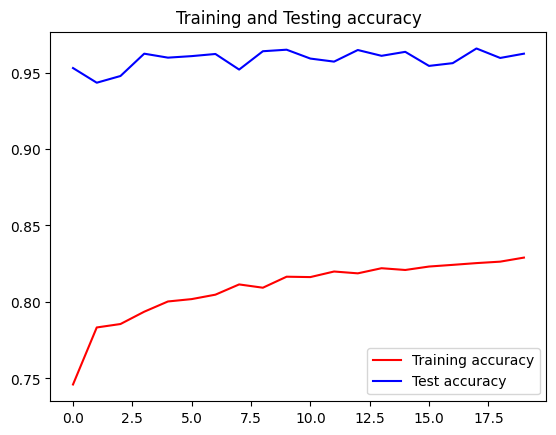

In [ ]:
#visualizing the accuracy
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, test_acc, 'b', label='Test accuracy')
plt.title('Training and Testing accuracy')
plt.legend(loc=0)
plt.show()

In [ ]:
#Testing our model on an image by uploading from local computer
from google.colab import files
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=load_img(path,target_size=(150,150))
  x=img_to_array(img)
  x/=255
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model_with_aug.predict(images,batch_size=10)
  print(classes)
  if classes>0.5:
    print(fn + " is a Dog")
  else:
    print(fn + " is a Cat")


Saving cat-8141916_1280.jpg to cat-8141916_1280.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.02244181]]
cat-8141916_1280.jpg is a Cat


In [ ]:
classes

array([[0.02244181]], dtype=float32)